# Data Engineering: Clean and Integrate Your Data! - Python version
*Authors: [Jonathan de Bruin](https://www.uu.nl/medewerkers/JdeBruin1) and [Frans de Liagre Böhl](https://www.uu.nl/medewerkers/FMTdeLiagreBohl)*

This [Jupyter Notebook](http://jupyter.org/) is additional material for the workshop "Data Engineering: Clean and Integrate Your Data!". The workshop is part of the [Data Science Day 2017](https://www.uu.nl/en/organisation/information-and-technology-services-its/13-april-2017-data-science-day/programme-overview/workshops/data-engineering-clean-and-integrate-your-data-workshop) by the [Information and Technology Services](https://www.uu.nl/en/organisation/information-and-technology-services-its) team of the Utrecht University. This workshop covers the basics of data cleaning and integrating data into a ‘tidy’ dataset. Tidy data dramatically speed downstream analysis tasks. Examples of data cleaning, imputing and integration will be demonstrated with Open Refine, Python and R. This Jupyter Notebook will give an example of data cleaning and integration with the Python-programming language. 

In this example, we study the relation between mortality and diseases. This is done by linking a mortality register dataset with a dataset of medical (disease) records. The datasets are fictitious. Research questions can be like: is there a relation between (surviving) Salmonella infection and the age of death. 

**Table of Contents**

* [Datasets](#datasets)
    * [Dataset 1: Mortality register](#dataset-mortality)
    * [Dataset 2: Hospital diagnosis records](#dataset-hospital)
* [Explore the data](#explore)
    * [Variable 1: sex](#explore-var-sex)
    * [Variable 2: place_of_death ](#explore-var-address)
    * [Variable 3: ICD10](#explore-var-icd10)
    * [Variable 4: given name](#explore-var-given-name)
    * [Variable 5: date of death](#explore-var-date)
* [Clean the data](#clean)
    * [Clean variable: sex](#clean-sex)
    * [Clean variable: last_name](#clean-last-name)
* [Enrich the data](#enrich)
* [Transform the data](#transform)
* [Integrate the data](#integrate)
    * [STOP STOP STOP](#integrate-advanced)
* [Final words](#final-words)


We first initialize the notebook and import ``pandas`` and ``numpy``. Pandas is a must have, strong and easy to use data manipulation framework written in Python. 

In [1]:
# enable inline plotting
%matplotlib inline

# python 2 and 3 compatibility
from __future__ import print_function

import pandas
import numpy

## Datasets <a class="anchor" id="datasets"></a>
As mentioned before, we use two datasets for this workshop. One dataset contains medical diagnoses, and the other dataset contains mortality records. Good to point out again, the datasets contain only fictitious data. The datasets are stored at https://github.com/J535D165/Data-Science-Day/tree/master/data. Both datasets are comma separated values (CSV) files, and utf-8 encoded. The package ``pandas`` has some excellent [functions to read and write text data files](http://pandas.pydata.org/pandas-docs/stable/io.html). These functions can be used to read local files, but also files from the internet. 

### Mortality register dataset <a class="anchor" id="dataset-mortality"></a>
The mortality register dataset contains data about 100 deceased people. Each record contains information about one of them. The data includes the following seven variables (stored in separate columns):

| Variable/Column| Description                                  |
|----------------|----------------------------------------------|
| patient_id     | A unique personal identifier                 |
| date_of_death  | The date (and time) of death of the deceased |
| place_of_death | The address of death                         |
| date_of_birth  | The date (and time) of birth                 |
| first_name     | The given name of the deceased               |
| last_name      | The last name of the deceased                |
| sex            | The sex of the deceased                      |

In [2]:
# read the mortality register data into memory
file_path_mort = 'https://raw.githubusercontent.com/J535D165/Data-Science-Day/master/data/mortality_register.csv'
df_mort = pandas.read_csv(file_path_mort)

# get the given column names
print(list(df_mort))

['patient_id', 'date_of_death', 'place_of_death', 'date_of_birth', 'first_name', 'last_name', 'sex']


### Hospital dataset <a class="anchor" id="dataset-hospital"></a>

The hospital dataset provides information about diagnoses and
treatments in hospitals. The diagnoses are classified with the 10th
revision of the [International Statistical Classification of Diseases and
Related Health Problems (ICD-10)](http://www.who.int/classifications/icd/en/). The dataset we are using contains 800 records. Each record
represents one diagnosis and assigns to a patient with a unique
personal identifier. This personal identifier is the same identifier as found in the mortality dataset. The following variables are included:

| Variable/Column| Description                                  |
|----------------|----------------------------------------------|
| patient_id     | A unique personal identifier                 |
| ICD10          | The International Classification of Diseases |
| datetime       | The date and time of the diagnosis           |


In [3]:
# read the hospital diagnosis data into memory
file_path_hosp = 'https://raw.githubusercontent.com/J535D165/Data-Science-Day/master/data/hospital_data.csv'
df_hosp = pandas.read_csv(file_path_hosp)

# get the given column names
print(list(df_hosp))

['patient_id', 'ICD10', 'datetime']


## Explore the data <a class="anchor" id="explore"></a>
The most essential part in data handling and cleaning is exploring the data. This part can take a relatively large amount of your time, but can be critical in your research. The most basic type of exploring to data is just by looking to some records. There are also more systematic approaches possible. Some tips when exploring data:

- Read the datasets metadata is available.
- Check [data types](https://en.wikipedia.org/wiki/Data_type)
- Check record identifiers and subject/entity identifiers (are they unique or not?)
- Count the number of unique observations for each variable and is this more or less than the number of possible outcomes?
- Sort the data on interesting variables.
- Find out how the (date) observations are formatted.
- Visualize histograms or distributions (of counts).
- Identify (all) overlapping variables between datasets.

In [4]:
# view the first 10 records of the mortality dataset
df_mort.head(10)

,patient_id,date_of_death,place_of_death,date_of_birth,first_name,last_name,sex
0,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male
1,cd613e30-d8f1-6adf-91b7-584a2265b1f5,2009-09-06,"77763 Tony Village Suite 690, Adamsbury",1938-04-15 06:47:45,Ryan,Gallagher,Male
2,d95bafc8-f2a4-d27b-dcf4-bb99f4bea973,2001-07-23 03:06:50,"9390 Yvonne Route Suite 858, Shawton WA",1927-09-12 05:25:03,A.,Houston,NaN
3,21636369-8b52-9b4a-97b7-50923ceb3ffd,2010-01-30,NaN,1952-05-21 07:32:09,Joshua,Wood,Male
4,b8a1abcd-1a69-16c7-4dal-f9fc3c6da5d7,2005-02-27,"10684 Jeffrey Plain, Joshuaburgh VT",1952-02-16,Brian,FOSTER,Male
5,5bc8fbbc-bde5-c099-4164-d8399f767c45,2012-08-14 08:17:39,"3021 HARRISON GATEWAY, STEPHENSSHIRE ID",1954-10-07 06:27:01,Heather,Vaughn,Female
6,14a03569-d26b-9496-92e5-dfe8cb1b55fe,2013-12-25 10:40:18,"29755 JOSEPH UNIONS, LAKE MONIQUE",1998-02-04 18:43:48,Angela,Gill,Female
7,6513270e-269e-0d37-f2a7-4de452e6b438,2002-07-26,"9083 CHRISTOPHER MANOR, EAST CHRISTOPHERCHESTER",1964-01-27,James,WILLIAMS,NaN
8,6018366c-f658-f7a7-5ed3-4fe53a096533,2006-04-20,23836 Stephen Motorway Simpsonborough WI,1950-11-08 15:18:07,V.,Martinez,Male
9,4462ebfc-5f91-5ef0-9cfb-ace67687a66e,2010-06-07 10:17:01,"8791 Spencer Ridges, Lake Nicholasmouth RI",1983-01-06 05:58:02,J.,Taylor,Male


In [5]:
# view the first 10 records of the hospital dataset
df_hosp.head(10)

,patient_id,ICD10,datetime
0,988a0c48-5979-91d1-7000-368d2534c02d,V97.33XD,2000-11-21 09:01:32
1,5d357ffe-4423-f60d-db0e-da407f5e8e61,W51.XXXA,2004-07-21 07:54:46
2,d95bafc8-f2a4-d27b-dcf4-bb99f4bea973,V00.01XD,2001-06-25 19:13:09
3,8dbb5b2a-6e20-af8e-1001-a6625a1298a1,Y93.D,2006-12-05 12:17:36
4,5532e8ba-3083-d49e-f945-e4b665c1d4b4,Z99.89,2004-07-14 08:23:10
5,0b07502e-d4c6-eb9c-9331-06745b3ce9b3,Y92.146,2001-10-31 05:25:21
6,f8463cd1-8389-7c06-8827-ecebc299f156,S10.87XA,2000-08-25 02:53:14
7,6b0404f2-b094-90b8-6b01-a1c12a3a2107,W55.41XA,2006-06-13 20:07:06
8,cd613e30-d8f1-6adf-91b7-584a2265b1f5,W61.62XD,2009-02-13 20:14:39
9,7450bc56-6fc6-4ccb-95b5-582a736a9625,Z63.1,2009-07-26 04:02:41


### Variable 1: sex <a class="anchor" id="explore-var-sex"></a>
In the mortality dataset, the variable *sex* is technically incorrect. There are integers used to encode male and females. Also, there are abbreviations found in the data. We explore this variable by making a histogram of the observation counts.   

['Male' 'Male' nan 'Male' 'Male' 'Female' 'Female' nan 'Male' 'Male'
 'Female' 'Male' '0' '0' '0' 'Female' 'Male' '1' 'Male' 'Female'] 

object 

['Male' nan 'Female' '0' '1' 'Fem.'] 



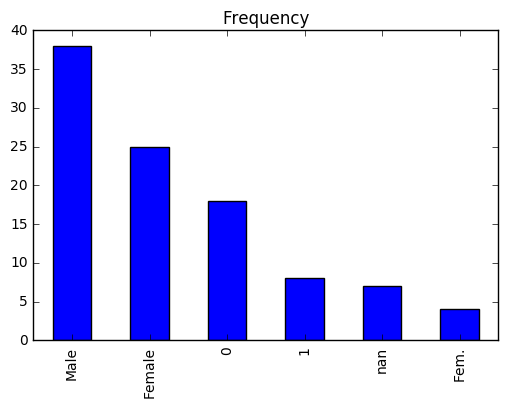

In [6]:
# print the first 20 values
print(df_mort["sex"].head(20).values, '\n')

# what is the data type? for example int or float? It is 'object', the 
# type used by numpy and pandas for columns with strings or mixed types.
print(df_mort["sex"].dtype, '\n')

# get all unique values (nan are missing values)
print(df_mort["sex"].unique(), '\n')

# count each unique value 
df_mort["sex"].value_counts()

# count each unique value including missing values. Missing values are 
# excluded by default. Show them by addding the 'dropna=False' argument 
# to the table function.
df_mort["sex"].value_counts(dropna=False)

# plot a histogram of value counts 
df_mort["sex"].value_counts(dropna=False).plot.bar(title="Frequency")

### Variable 2: place_of_death <a class="anchor" id="explore-var-address"></a>
The place of death is an address which is stored in a single column as text. Such a variable is much harder to explore. You need visual inspection to explore such a variable. In our case, there is some sort of structure in most of the records. 

In [7]:
# output the value for the first 20 rows
print(df_mort["place_of_death"].head(20).values, '\n')

# get the data type of this column
print(df_mort["place_of_death"].dtype, '\n')

# The result of the first statement shows that there are a lot of 
# different addresses in the dataset. Displaying all outcomes is not 
# useful. Instead of showing everything, we count the number of 
# unique values. It turns out that there are 97 unique values in 
# 100 records. 
print(len(df_mort["place_of_death"].unique()))

['4759 William Haven Apt. 194, West Corey'
 '77763 Tony Village Suite 690, Adamsbury'
 '9390 Yvonne Route Suite 858, Shawton WA' nan
 '10684 Jeffrey Plain, Joshuaburgh VT'
 '3021 HARRISON GATEWAY, STEPHENSSHIRE ID'
 '29755 JOSEPH UNIONS, LAKE MONIQUE'
 '9083 CHRISTOPHER MANOR, EAST CHRISTOPHERCHESTER'
 '23836 Stephen Motorway Simpsonborough WI'
 '8791 Spencer Ridges, Lake Nicholasmouth RI'
 '7420 Murphy Gateway, Bradleyberg ND'
 '8932 SOTO UNDERPASS APT. 174, NORTH AMANDA WV'
 '0574 Vaughn Rapid, New Aaron MP' '323 DAVID PLACE LAKE KENNETH MN'
 '4417 Owens Well Longville IL' nan
 '64330 Turner Isle Apt. 940, New Jon WI'
 '84103 Ochoa Manor Suite 856, New Bryan VT' '7274 Eaton Flat, Rachelville'
 '5849 Brooke Coves, Robertview VI'] 

object 

97


### Variable 3: ICD10 codes <a class="anchor" id="explore-var-icd10"></a>
The ICD-10 code is given for each hospital record. The ICD-10 code is a code found in the 10th revision of the International Statistical Classification of Diseases and Related Health Problems (ICD-10). For this variable, we are making a histogram of frequencies. 


['V97.33XD' 'W51.XXXA' 'V00.01XD' 'Y93.D' 'Z99.89' 'Y92.146' 'S10.87XA'
 'W55.41XA' 'W61.62XD' 'Z63.1' 'W220.2XD' 'V91.07XD' 'W55.29XA' 'V95.43XS'
 'W61.12XA' 'R46.1' 'T60.92XS' 'V79.10XA' 'V64.3XXA' 'S20.359D'] 

object 

416 

1    184
2    124
3     77
4     21
5      7
6      3
Name: ICD10, dtype: int64 



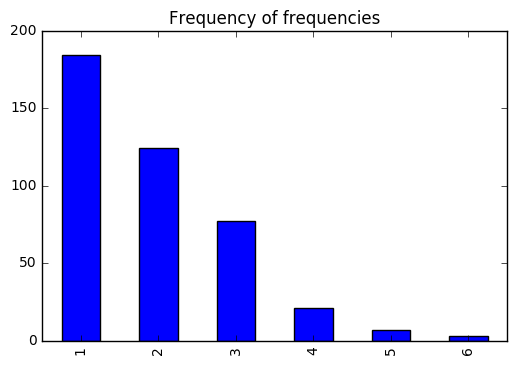

In [8]:
# print the first 20 values
print(df_hosp["ICD10"].head(20).values, '\n')

# what is the data type?
print(df_hosp["ICD10"].dtype, '\n')

# Again, there are a lot of unique values (416 out of 800 records). This
# is still to much for making tables or plots.
print(len(df_hosp["ICD10"].unique()), '\n')

# But there is another trick. Make a table of tables! This counts the 
# number of times a ICD-10 code occurs x times. 
print(df_hosp["ICD10"].value_counts().value_counts(), '\n')

# We can also plot such a table of frequencies. It learns us that there
# are no ICD-10 codes that occur more than 6 times. Also, the frequency 
# of frequencies looks quite exponential decreasing --> so the ICD10 codes 
# are more or less uniformly distributed. 
df_hosp["ICD10"].value_counts().value_counts().plot.bar(title="Frequency of frequencies")

### Variable 4: Given names <a class="anchor" id="explore-var-given-name"></a>
This one is for you. So, ``df_mort["first_name"]``

In [9]:
# up to you


### Variable 5: Date of death <a class="anchor" id="explore-var-date"></a>
This one is for also you and a bit more challenging. So, ``df_mort['date_of_death']``

In [10]:
# up to you


## Clean the data <a class="anchor" id="clean"></a>
We do have a good feeling for the data now. Now we can start with cleaning the data. Data cleaning, often named data cleansing, is the process that is described by Wikipedia as:

> Data cleansing, data cleaning, or data scrubbing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. Data cleansing may be performed interactively with data wrangling tools, or as batch processing through scripting. ([Wikipedia, Data Cleansing](https://en.wikipedia.org/wiki/Data_wrangling))

Sometimes it is hard to decide whether to clean everything by hand (data munging/wrangling) with tools like OpenRefine and Excel, or to clean by scripting. In general, large datasets are better to script, while smaller ones can be cleaned by hand within the time of a coffee break. Switching from data munging to scripting is no waste of time, because it improves the quality of the script. 

### Clean variable 1: sex <a class="anchor" id="clean-sex"></a>
We start with the variable that encodes the sex of the deceased. We saw before that this variable contains abbreviations and integer encoding. 

In [11]:
# unique values at start
print(df_mort['sex'].unique())

# replace inconsistent values
df_mort.loc[df_mort['sex'] == "0", 'sex'] = "Male"
df_mort.loc[df_mort['sex'] == "1", 'sex'] = "Female"
df_mort.loc[df_mort['sex'] == "", 'sex'] = numpy.nan # Not Available

# check the intermediate result (still one abbraviation in there)
print(df_mort['sex'].unique())

# you can also check for the first letters with the startswith function
df_mort.loc[df_mort['sex'].str.startswith("F") == True, 'sex'] = "Female"

# The unique outcomes after cleaning. 
print(df_mort['sex'].unique())


['Male' nan 'Female' '0' '1' 'Fem.']
['Male' nan 'Female' 'Fem.']
['Male' nan 'Female']


### Clean variable 2: last name <a class="anchor" id="clean-last-name"></a>
Some last names are uppercase. This is inconsistent and needs to be fixed.

In [12]:
# Capatilize the first letter and lower all other letters
df_mort['last_name'] = df_mort['last_name'].str.title()

### Clean variable 3: first name
The given/first name does not need a lot of cleaning. Can you make a column with the first letters of the deceased peoples and the full given name if available?

Hint: ``df_mort['first_name'].str[0]`` extracts the first letter and ``df_mort['first_name'].str[-1]`` the last letter. 

In [13]:
# up to you


## Information extraction <a class="anchor" id="extract"></a>
The address variable contains information about the state, postal code, street name and house number. In this step, the relevant attributes are extracted from the single column variable ``place_of_death`` and stored in multiple columns. This process is part of *information extraction*. Information extraction is the process of automatically extracting structured information from unstructured (text) data. 

For this part, we use regular expressions. Regular expressions are a powerful tool to extract information from text. Although it is sometimes a bit hard to understand, it is very useful to learn. Regular expressions can also be used in Excel, OpenRefine and SPSS. There are plenty of online tools to learn about regular expressions and to test them (http://regexr.com/).

In [14]:
# extract the postal code
matches = df_mort['place_of_death'].str.extract("^(\d+)\s(.*)", expand=True)
df_mort['postal_code'] = matches[0].fillna('')
# print(matches.head()) # the output is split into two columns 

# extract the state code
matches = matches[1].str.extract("(.*?)(\s[A-Z]{2}|)$", expand=True)
df_mort['state'] = matches[1].fillna('')

# split the street, housenumber and place
matches = matches[0].str.extract("^([^0-9\,]+)((\d*)(\,\s|\s))*(.*?)$", expand=True)
df_mort['street'] = matches[0].fillna('')
df_mort['housenumber'] = matches[2].fillna('')
df_mort['placename'] = matches[4].fillna('')

# The result is not without mistakes. It seems that a bit of data munching is still needed. 
df_mort.tail()

,patient_id,date_of_death,place_of_death,date_of_birth,first_name,last_name,sex,postal_code,state,street,housenumber,placename
95,f8463cd1-8389-7c06-8827-ecebc299f156,2008-09-27 18:53:04,0209 Crystal Valley North Ashley NH,1992-05-20 22:25:59,Tracy,Doyle,Female,0209,NH,Crystal Valley North Ashley,,
96,ac6289f7-e85a-1ee9-508d-be225edf44c0,2005-05-09,"50026 Miller Junction, Joshuahaven UT",1970-06-09 08:54:20,Terry,Foster,Male,50026,UT,Miller Junction,,Joshuahaven
97,fec20c5f-ce5b-14fe-6dd0-9a3531cd3165,2007-04-19,"080 Pamela Via, Michealland OH",1946-06-23 12:38:57,Robert,Watson,Male,080,OH,Pamela Via,,Michealland
98,0b07502e-d4c6-eb9c-9331-06745b3ce9b3,2009-10-12,"4817 Raymond Shoal, Adamtown SD",1968-07-03 16:17:51,Ronald,Gomez,NaN,4817,SD,Raymond Shoal,,Adamtown
99,9974d75b-3338-24fe-6179-0134676b1b69,2006-06-23 22:56:54,14688 Shawna Overpass South Jennifer NC,1974-12-24 21:17:25,C.,White,Male,14688,NC,Shawna Overpass South Jennifer,,


## Enrich the data <a class="anchor" id="enrich"></a>
The ICD-10 codes are not very informative without a description of the disease or health problem. In the following notebook cell, we are enriching the hospital data with a description of the ICD-10 codes. The USA government has descriptions of the ICD-10 codes online (https://www.cdc.gov/nchs/icd/icd10.htm). The data is in the Fixed Width Formatted (FWF) data format. 

A bit bored because everything is already part of your daily routines? Check out these bizarre ICD10 codes: http://www.schumacherclinical.com/health-care-insights/2015/9/top-20-craziest-icd-10-codes. Our favorite is "Sucked into jet engine, subsequent encounter."

In [15]:
# the location of the file with ICD-10 codes
file_path_icd10 = "ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/2017/icd10cm_codes_2017.txt"

# download the data
icd10codes = pandas.read_fwf(file_path_icd10, [(0, 8), (8,1000)], 
                             header=None, 
                             names=['ICD10', 'Description'])

# Add the description of the ICD-10 codes to the hospital data. This is 
# done with the merge function.

# do some cleaning of the ICD-10 codes and store it in a dummy variable
df_hosp['ICD10_no_dot'] = df_hosp['ICD10'].str.replace('.', '')

# merge the datasets
df_hosp = df_hosp.merge(icd10codes, left_on='ICD10_no_dot', right_on='ICD10', how='left', suffixes=['', '_y'])
del df_hosp['ICD10_no_dot'] # remove unwanted columns
del df_hosp['ICD10_y']

# show the first records.
df_hosp.head(10)

,patient_id,ICD10,datetime,Description
0,988a0c48-5979-91d1-7000-368d2534c02d,V97.33XD,2000-11-21 09:01:32,"Sucked into jet engine, subsequent encounter"
1,5d357ffe-4423-f60d-db0e-da407f5e8e61,W51.XXXA,2004-07-21 07:54:46,Accidental striking against or bumped into by ...
2,d95bafc8-f2a4-d27b-dcf4-bb99f4bea973,V00.01XD,2001-06-25 19:13:09,Pedestrian on foot injured in collision with r...
3,8dbb5b2a-6e20-af8e-1001-a6625a1298a1,Y93.D,2006-12-05 12:17:36,NaN
4,5532e8ba-3083-d49e-f945-e4b665c1d4b4,Z99.89,2004-07-14 08:23:10,Dependence on other enabling machines and devices
5,0b07502e-d4c6-eb9c-9331-06745b3ce9b3,Y92.146,2001-10-31 05:25:21,Swimming-pool of prison as the place of occurr...
6,f8463cd1-8389-7c06-8827-ecebc299f156,S10.87XA,2000-08-25 02:53:14,Other superficial bite of other specified part...
7,6b0404f2-b094-90b8-6b01-a1c12a3a2107,W55.41XA,2006-06-13 20:07:06,"Bitten by pig, initial encounter"
8,cd613e30-d8f1-6adf-91b7-584a2265b1f5,W61.62XD,2009-02-13 20:14:39,"Struck by duck, subsequent encounter"
9,7450bc56-6fc6-4ccb-95b5-582a736a9625,Z63.1,2009-07-26 04:02:41,Problems in relationship with in-laws


## Transform the data <a class="anchor" id="transform"></a>

The hospital data may contain multiple diagnoses for the same patient. Sometimes, it is desirable to have one record for each patient and store the information in the columns. This requires transforming the data. Data transformation is very easy with ``pandas``. There are advanced functions available, such as ``stack`` and ``unstack``. The function ``pandas.crosstab`` is very useful to make cross tables (such as you do quite often in Excel). We are using the function ``crosstab`` for the transformation of data. 

In [16]:
# make a column with the ICD class of each ICD-code. (this is the first letter)
df_hosp['ICD10_class'] = "ICD-10-" + df_hosp['ICD10'].str[0]

# make a cross table with the frequencies 
pandas.crosstab(df_hosp['patient_id'], df_hosp['ICD10_class']).head()

ICD10_class,ICD-10-B,ICD-10-I,ICD-10-M,ICD-10-Q,ICD-10-R,ICD-10-S,ICD-10-T,ICD-10-V,ICD-10-W,ICD-10-X,ICD-10-Y,ICD-10-Z
patient_id,,,,,,,,,,,,
02f16d3d-8f4c-29e7-d92b-0703f7467ac9,0,0,0,1,0,7,3,2,0,0,0,0
055665f0-fbb3-e84e-0ef1-52125425b7b2,0,0,0,0,0,2,1,2,0,0,0,0
06a3f5be-62a9-701b-4279-530735b8cfae,0,1,0,1,0,7,1,1,0,0,0,0
07158ab7-95f3-8183-5b69-13cd87684f34,0,1,0,0,0,6,1,1,1,0,1,0
0a3aee49-6666-0879-138d-da71e3658966,0,1,0,0,0,5,1,1,1,0,1,1


## Integrate the datasets <a class="anchor" id="integrate"></a>
In this step, we unify the mortality register data and the hospital data. This will result into one unified dataset that is ready for scientific research. This process is called 'data integration' and is a very active research field in computer and data science. Wikipedia describes "Data Integration" as:

> Data integration involves combining data residing in different sources and providing users with a unified view of these data. This process becomes significant in a variety of situations, which include both commercial and scientific domains. Data integration appears with increasing frequency as the volume and the need to share existing data explodes. It has become the focus of extensive theoretical work, and numerous open problems remain unsolved. ([Wikipedia 2017, Data Integration](https://en.wikipedia.org/wiki/Data_integration))

The python programming language has good (built-in) functionalities for data integration (but they may have a steep learning curve). However, ``pandas`` has some excellent and easy tools for data integration. One function that is extremely useful is the intuitive method ``merge`` . This method can be used to merge files into one file. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) for more information. 

In [17]:
# merge on the patient identifier to make one unified dataset
df_unified = df_mort.merge(df_hosp, on='patient_id')

# count the number of rows
print(len(df_unified), '\n')

# output the first rows of the unified dataframe
df_unified.head()

716 



,patient_id,date_of_death,place_of_death,date_of_birth,first_name,last_name,sex,postal_code,state,street,housenumber,placename,ICD10,datetime,Description,ICD10_class
0,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,S22.080S,2000-01-11 09:07:50,Wedge compression fracture of T11-T12 vertebra...,ICD-10-S
1,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,T65.0X3S,2008-01-15 01:54:35,"Toxic effect of cyanides, assault, sequela",ICD-10-T
2,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,T82.867D,2001-02-03 05:07:58,"Thrombosis due to cardiac prosthetic devices, ...",ICD-10-T
3,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,S66.327D,2000-12-21 04:11:56,"Laceration of extensor muscle, fascia and tend...",ICD-10-S
4,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,S22.080S,2003-04-11 00:13:06,Wedge compression fracture of T11-T12 vertebra...,ICD-10-S


We have merged the datasets into one single dataframe which is ready for statistical analysis in a program like SPSS or STATA. The data cleaning work is ready and the real work can start!

### STOP, STOP, STOP <a class="anchor" id="integrate-advanced"></a>

You might think this was the result we were looking for, but we missed one step. We haven't explored the ``patient_id`` variable. Especially the variables you merge on need to be analyzed securely. Mistakes on these variables can extrapolate. 

The following code can be a bit more complicated. Focus on the strategy if it's hard for you to understand the code. We compute the **[Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance)** for all possible combinations of patient identifiers. One can do this within a dataset to search for potential duplicates, but also between the two datasets. The Levenshtein distance is computed with the function in the cell below. 


In [18]:
def levenshtein(s1, s2):
    """Compute the Levenshtein distance between two strings."""
    if len(s1) < len(s2):
        return levenshtein(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1 
            deletions = current_row[j] + 1 
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
            
        previous_row = current_row
    
    return previous_row[-1]

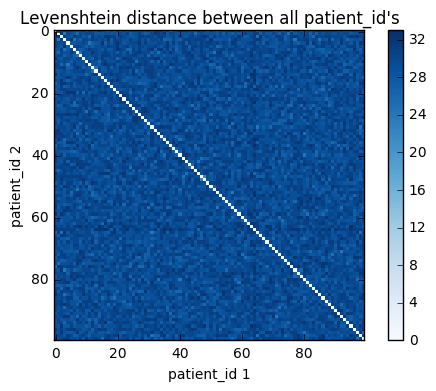

In [19]:
# import matplotlib for plotting
from matplotlib import pyplot

# compute the Levensthein distance between all patient_id's 
# in the mortality register. 
df_mort_dist = numpy.array([[levenshtein(pat1, pat2) for pat1 in df_mort['patient_id']] 
                for pat2 in df_mort['patient_id']])

# plot the grid
dist_plot = pyplot.imshow(df_mort_dist,interpolation='nearest', cmap='Blues')

pyplot.title("Levenshtein distance between all patient_id's")
pyplot.xlabel("patient_id 1")
pyplot.ylabel("patient_id 2")
pyplot.colorbar(dist_plot) # add a color bar
pyplot.show()

# Make a 2d grid plot. The number on the axes represent the integer id's of the
# unique patient id's.

How do we interpret this graph? Note that all white cells are on the diagonal (compared with themselves...). **This is good.** This implies that there is almost no similarity between true distinct patient identifiers. 

Now we compare the patient identifiers of both datasets. 

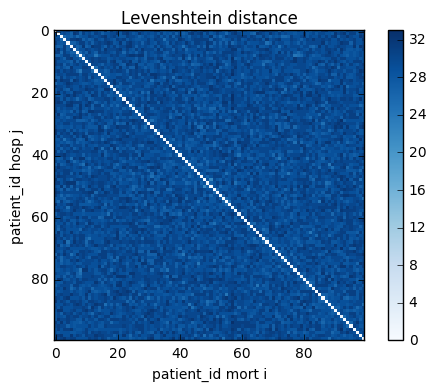

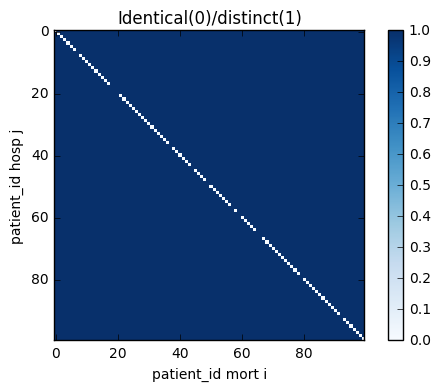

In [20]:
# compute the distance between all records in the mortality register 
# with all records in the hopsital dataset
df_mort_sort = numpy.sort(df_mort['patient_id'].unique())
df_hosp_sort = numpy.sort(df_hosp['patient_id'].unique())

# compute the Levenshtein distance
df_mort_hosp_dist = numpy.array([[levenshtein(pat1, pat2) for pat1 in df_mort_sort] for pat2 in df_hosp_sort])

# plot the result. 
dist_plot = pyplot.imshow(df_mort_hosp_dist, interpolation='nearest', cmap='Blues')

pyplot.title("Levenshtein distance")
pyplot.xlabel("patient_id mort i")
pyplot.ylabel("patient_id hosp j")
pyplot.colorbar(dist_plot) # add a color bar
pyplot.show()

# again the result looks good, but a closer look reveals the problem. 
# We set all distances larger than zero one. In fact we are binarizing 
# the result. This is what happens with a simple merge statement.
df_mort_hosp_dist_bin = df_mort_hosp_dist
df_mort_hosp_dist_bin[df_mort_hosp_dist_bin > 0] = 1

# plot the new result
pyplot.figure()
dist_plot = pyplot.imshow(
    df_mort_hosp_dist_bin, 
    interpolation='nearest', 
    cmap='Blues'
)

pyplot.title("Identical(0)/distinct(1)")
pyplot.xlabel("patient_id mort i")
pyplot.ylabel("patient_id hosp j")
pyplot.colorbar(dist_plot) # add a color bar
pyplot.show()

This reveals that there are quite some close matches. We are missing quite some matches when using the naive way.

In [21]:
# set the treshold to a maximum of 5 mistakes. 
treshold = 5

# get the sorted unique patient identifiers
df_mort_sort = numpy.sort(df_mort['patient_id'].unique())
df_hosp_sort = numpy.sort(df_hosp['patient_id'].unique())

# put it into a dataframe
df_mort_hosp_dist = pandas.DataFrame(
    [(pat1, pat2, levenshtein(pat1, pat2)) for pat1 in df_mort_sort for pat2 in df_hosp_sort],
    columns=['patient_id_mort', 'patient_id_hosp', 'distance']
)

# consider all records with less than 5 mistakes as matches
matches = df_mort_hosp_dist[df_mort_hosp_dist['distance'] < treshold]

# merge both datasets with the matches 
df_unified = df_mort.merge(
    matches, 
    left_on='patient_id', 
    right_on='patient_id_mort'
).merge(
    df_hosp, 
    left_on='patient_id_hosp', 
    right_on='patient_id',
    suffixes=['', '_y']
).drop(
    ['patient_id_mort', 'patient_id_hosp', 'patient_id_y'], 
    axis=1
)

# count the number of rows. Now we do have 800 matches instead of 716!!!
print(len(df_unified))

# the new result!!
df_unified.head() 


800


,patient_id,date_of_death,place_of_death,date_of_birth,first_name,last_name,sex,postal_code,state,street,housenumber,placename,distance,ICD10,datetime,Description,ICD10_class
0,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,0,S22.080S,2000-01-11 09:07:50,Wedge compression fracture of T11-T12 vertebra...,ICD-10-S
1,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,0,T65.0X3S,2008-01-15 01:54:35,"Toxic effect of cyanides, assault, sequela",ICD-10-T
2,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,0,T82.867D,2001-02-03 05:07:58,"Thrombosis due to cardiac prosthetic devices, ...",ICD-10-T
3,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,0,S66.327D,2000-12-21 04:11:56,"Laceration of extensor muscle, fascia and tend...",ICD-10-S
4,e3e70682-c209-4cac-629f-6fbed82c07cd,2012-11-22 18:21:09,"4759 William Haven Apt. 194, West Corey",1972-06-06 16:13:46,Steve,Williams,Male,4759,,William Haven Apt.,194,West Corey,0,S22.080S,2003-04-11 00:13:06,Wedge compression fracture of T11-T12 vertebra...,ICD-10-S


As you can see, the number of matches increases from 719 to 800. An increase of nearly 10%. This can change your statistical results. 

## Final words <a class="anchor" id="final-words"></a>

The examples given in this notebook gave you a very short introduction in the topic of data cleaning and integration. Data cleansing and integration is a very time consuming part of a research. We hope that this notebook shows the need for good data cleaning and the consequences if done badly. Data cleansing and integration is an active research field. Developments in the field of machine learning may lead to new opportunities. Nevertheless, the data cleansing techniques like discussed in this notebook remain relevant. 